Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [74]:
# imports
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns

import warnings

# Suppress seaborn and pandas warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [75]:
bike_stations_df = pd.read_csv('bike_stations.csv', index_col = 0)
yelp_business_df = pd.read_csv('yelp_business.csv', index_col = 0)

Join the data from both dataframes on Station Name and drop columns not needed

In [76]:
Business_and_Bike_Stations_df = pd.merge(yelp_business_df, bike_stations_df, on = 'Station Name')
Business_and_Bike_Stations_df = Business_and_Bike_Stations_df.drop(columns=['Latitude', 'Longitude'])

In [77]:
Business_and_Bike_Stations_df['Number of Bikes'] = Business_and_Bike_Stations_df['Available Bikes'] + Business_and_Bike_Stations_df['Empty Slots']
Business_and_Bike_Stations_df

,Station Name,Station Latitude,Station Longitude,Business Category,Business Name,Rating,Number of Reviews,Address,Contact,Available Bikes,Empty Slots,Number of Bikes
0,SE 47th at Hawthorne,45.511950,-122.614160,Mexican,Por Qué No? Taqueria,4.0,1365,4635 SE Hawthorne Blvd,(503) 954-3138,1,2,3
1,SE 47th at Hawthorne,45.511950,-122.614160,Pizza,Apizza Scholls,4.0,1753,4741 SE Hawthorne Blvd,(503) 233-1286,1,2,3
2,SE 47th at Hawthorne,45.511950,-122.614160,Lounges,Sapphire Hotel,4.5,492,5008 SE Hawthorne Blvd,(503) 232-6333,1,2,3
3,SE 47th at Hawthorne,45.511950,-122.614160,Noodles,Baka Umai,4.5,178,4703 SE Hawthorne Blvd,(971) 255-0116,1,2,3
4,SE 47th at Hawthorne,45.511950,-122.614160,Thai,Khao Thai,4.5,73,4604 SE Hawthorne Blvd,(971) 346-2422,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4749,NE 29th Ave (U of O),45.570366,-122.636043,Bakeries,Flour Market,5.0,28,5507 NE 30th Ave,(503) 209-5363,5,1,6
4750,NE 29th Ave (U of O),45.570366,-122.636043,Food Trucks,Honey Butter Country Fare,5.0,26,6719 NE 18th Ave,(503) 209-5363,5,1,6
4751,NE 29th Ave (U of O),45.570366,-122.636043,Coffee & Tea,Kiss Coffee,5.0,37,3016 NE Ainsworth St,(503) 209-5363,5,1,6
4752,NE 29th Ave (U of O),45.570366,-122.636043,Burgers,Bless Your Heart Burgers,4.0,132,5410 NE 33rd Ave,(503) 719-6447,5,1,6


In [78]:
Business_and_Bike_Stations_df.to_csv('Business_and_Bike_Stations.csv')

Using the aggregate argument for summary stats of the dataframe for Business and Bike Stations

In [79]:
grouped_business = Business_and_Bike_Stations_df.groupby('Station Name').agg({
    'Rating': 'mean',
    'Number of Reviews': 'mean',
    'Number of Bikes': 'max'
}).reset_index()

grouped_business = grouped_business.rename(columns={
    'Rating': 'Average Rating',
    'Number of Reviews': 'Average Reviews',
})
grouped_business_df = pd.DataFrame(grouped_business)
print(grouped_business_df)

                        Station Name  Average Rating  Average Reviews  \
0            Broadway Residence Hall        4.175000       572.050000   
1                Casey Eye Institute        4.175000        80.850000   
2              Cleveland High School        4.300000       561.050000   
3                         Cully Park        4.083333        47.111111   
4    Doernbecher Children's Hospital        4.175000        48.750000   
..                               ...             ...              ...   
233      SW Yamhill at Director Park        4.175000      1497.900000   
234                    Shattuck Hall        4.175000       605.500000   
235         Tilikum West at SW Moody        4.025000       285.600000   
236     Urban Center Plaza at SW 6th        4.150000       741.550000   
237        W Burnside at SW Park Ave        4.200000      1707.550000   

     Number of Bikes  
0                  4  
1                  6  
2                  9  
3                 10  
4       

In [80]:
grouped_business_df.to_csv('grouped_business.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [81]:
Business_and_Bike_Stations_df.shape

(4754, 12)

In [82]:
Business_and_Bike_Stations_df['Station Name'].describe()

count                     4754
unique                     238
top       SE 47th at Hawthorne
freq                        20
Name: Station Name, dtype: object

In [83]:
Business_and_Bike_Stations_df['Rating'].describe()

count    4754.000000
mean        4.218237
std         0.446090
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [84]:
Business_and_Bike_Stations_df['Number of Bikes'].describe()

count    4754.000000
mean        9.639041
std         5.087424
min         1.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        25.000000
Name: Number of Bikes, dtype: float64

<Axes: xlabel='Number of Bikes', ylabel='Count'>

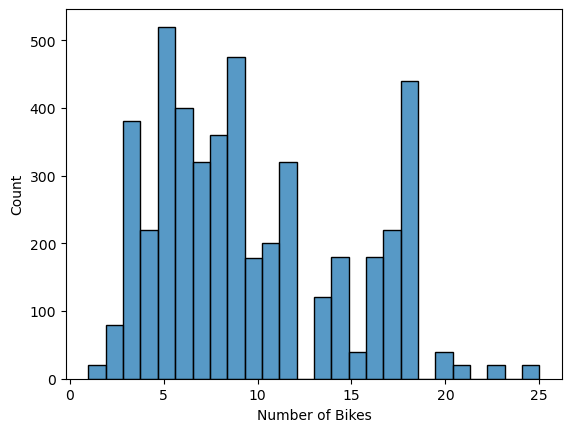

In [85]:
sns.histplot(Business_and_Bike_Stations_df['Number of Bikes'])

<Axes: xlabel='Rating', ylabel='Count'>

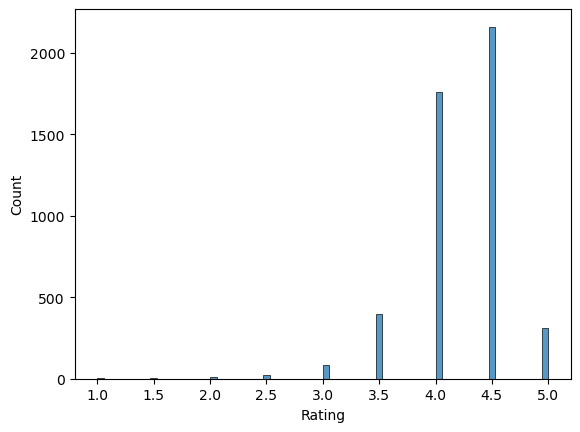

In [86]:
sns.histplot(Business_and_Bike_Stations_df['Rating'])

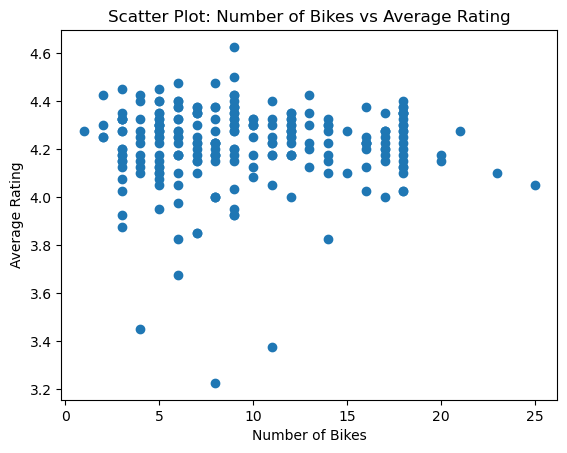

In [91]:
import matplotlib.pyplot as plt

plt.scatter(grouped_business_df['Number of Bikes'], grouped_business_df['Average Rating'])
plt.title('Scatter Plot: Number of Bikes vs Average Rating')
plt.xlabel('Number of Bikes')
plt.ylabel('Average Rating')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [92]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [93]:
connection = create_connection("Business_and_Bike_Stations.sqlite")
connect = sqlite3.connect('Business_and_Bike_Stations.sqlite')

Connection to SQLite DB successful


In [94]:
table_name = 'Business_and_Bike_Stations'
Business_and_Bike_Stations_df.to_sql(table_name, connect, if_exists='replace', index=False)

4754

In [95]:
connect.commit()
connect.close()

Look at the data before and after the join to validate your data.

In [96]:
print(len(bike_stations_df.index))
print(bike_stations_df.shape[0])
print(bike_stations_df.shape[1])
print(bike_stations_df[bike_stations_df.columns[0]].count())

238
238
5
238


In [97]:
print(len(yelp_business_df.index))
print(yelp_business_df.shape[0])
print(yelp_business_df.shape[1])
print(yelp_business_df[yelp_business_df.columns[0]].count())

4754
4754
9
4754


In [98]:
print(len(Business_and_Bike_Stations_df.index))
print(Business_and_Bike_Stations_df.shape[0])
print(Business_and_Bike_Stations_df.shape[1])
print(Business_and_Bike_Stations_df[Business_and_Bike_Stations_df.columns[0]].count())

4754
4754
12
4754
